<a href="https://colab.research.google.com/github/IamHassanAb/WebScraping-Reddit-old-Python/blob/main/WebScrapping(reddit)_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install requests
!pip install beautifulsoup4

In [ ]:
import requests
import csv
import time
from bs4 import BeautifulSoup as soup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap

###The Real Project

In [ ]:
url = "https://old.reddit.com/r/webdev/"
# Headers to mimic a browser visit
headers = {'User-Agent': 'Mozilla/5.0'}

# Returns a requests.models.Response object
page_html = requests.get(url, headers=headers)

In [ ]:
page_soup = soup(page_html.content, 'html.parser')
page_soup

In [ ]:
# domains = page_soup.find_all("span", class_="domain")
# for domain in domains:
#   if domain.text != '(self.webdev)':
#     continue
#   print(domain.text)

In [ ]:
# #iterating through the list of domains obtained

# for domain in domains:
#   if domain.text != '(self.webdev)':
#     continue
#   parent_div = domain.parent.parent.parent.parent
#   print(parent_div.text)

In [ ]:
counter = 1
att = {'class': 'thing', 'data-domain': 'self.webdev'}
posts = page_soup.find_all('div', attrs=att)
while (counter <= 100):
  for post in posts:
    title = post.find('p', class_="title").text
    author = post.find('a', class_='author').text
    likes = post.find("div", attrs={"class": "score likes"}).text
    comments = post.find('a', class_='comments').text.split()[0]
    if comments == 'comment':
      comments = 0
    if likes == "•":
      likes = "None"
    post_line = [counter, title, author, likes, comments]
    with open('output.csv', 'a') as f:
        writer = csv.writer(f)
        writer.writerow(post_line)
    
    counter += 1

  next_button = page_soup.find("span", class_="next-button")
  next_page_link = next_button.find("a").attrs['href']
  time.sleep(2)
  page_html = requests.get(next_page_link, headers=headers)
  page_soup = soup(page_html.content, 'html.parser')
  posts = page_soup.find_all('div', attrs=att)

###Data Analysis

In [ ]:
path = '/content/output.csv'
df = pd.read_csv(path)
df.head(10)
df = df.drop_duplicates(keep='last')
df[df.duplicated()]

,1,Monthly Getting Started / Web Dev Career ThreadMonthly Career Thread (self.webdev),AutoModerator,66,228


In [ ]:
df = df.drop(columns=['1'])

In [ ]:
col_names = ['Title', 'Author', 'Likes', 'Comments']
df.columns = col_names
df

,Title,Author,Likes,Comments
0,Relational Database Indexing Is SUPER IMPORTAN...,CharlieandtheRed,354,108
3,First Collaborative Project (self.webdev),Potato4eternity,None,0
4,Ask r/webdev: What API has brought you the mos...,llogiq,7,4
7,My site is now fully responsive and it feels a...,Vitamina_e,29,12
14,Monthly Getting Started / Web Dev Career Threa...,AutoModerator,71,228
...,...,...,...,...
118,WTH is going on with SSLs? Seems like a scam. ...,hotfwah,2,55
119,Looking for an off-the-shelf script for a mass...,Jackster22,2,0
120,Help getting a token out of a function to use ...,Not_A_Van,3,4
121,What video tell would you use to make a vector...,Beneficial-Skill-824,1,0


In [ ]:
df[:10]

,Title,Author,Likes,Comments
0,Relational Database Indexing Is SUPER IMPORTAN...,CharlieandtheRed,354,108
3,First Collaborative Project (self.webdev),Potato4eternity,None,0
4,Ask r/webdev: What API has brought you the mos...,llogiq,7,4
7,My site is now fully responsive and it feels a...,Vitamina_e,29,12
14,Monthly Getting Started / Web Dev Career Threa...,AutoModerator,71,228
15,Relational Database Indexing Is SUPER IMPORTAN...,CharlieandtheRed,351,108
16,Is it getting tougher to get a job as a junior...,DavidOrzc,None,11
17,"Will taking a course from W3C and getting a ""p...",nuclearxrd,None,1
18,First Collaborative Project (self.webdev),Potato4eternity,3,0
19,Ask r/webdev: What API has brought you the mos...,llogiq,10,4


([0, 1, 2, 3, 4, 5, 6], <a list of 7 Text major ticklabel objects>)

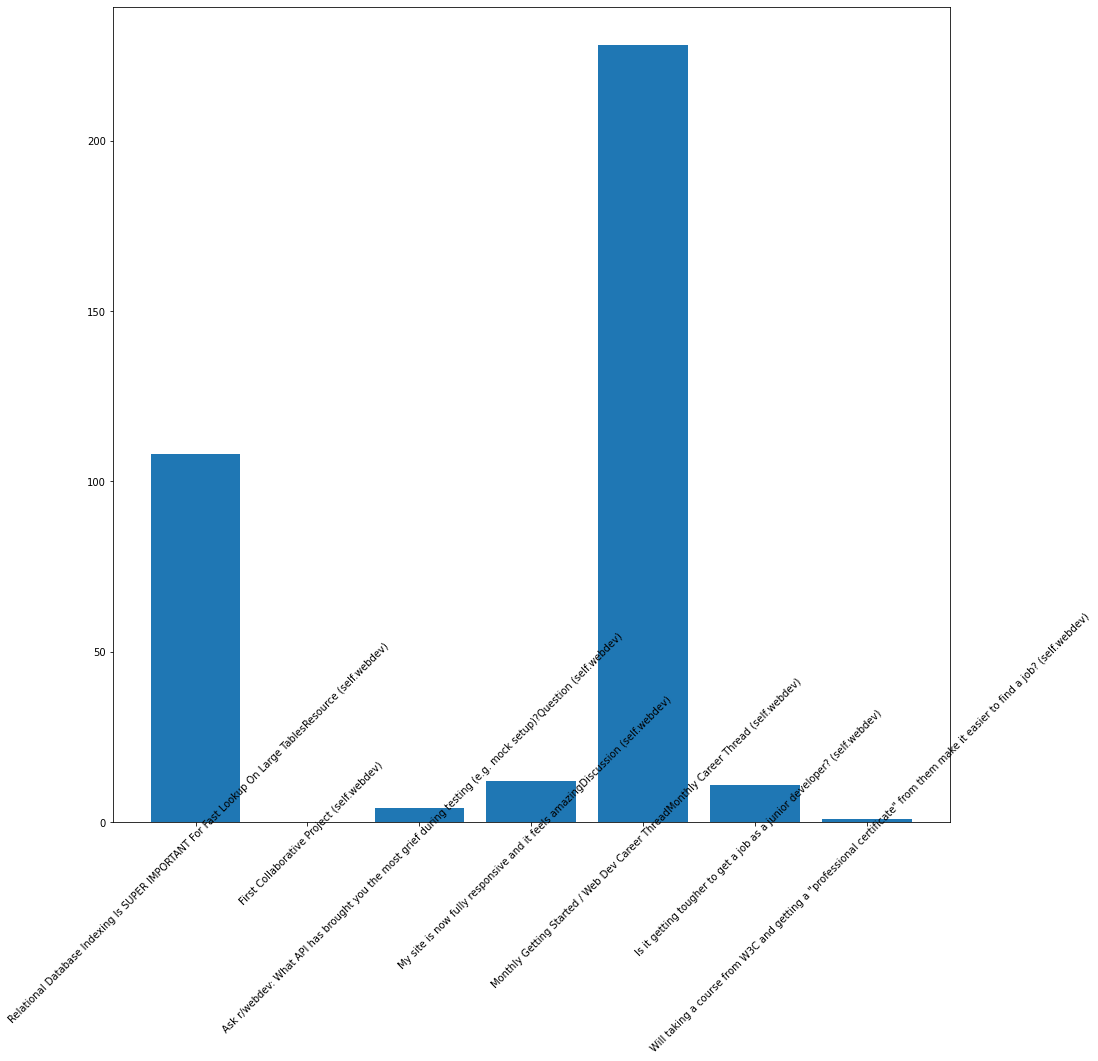

In [ ]:
plt.subplots(figsize=(15,15))
plt.bar(df[:10]['Title'],df[:10]['Comments'])
plt.xticks(wrap=True, rotation=45)